In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded=files.upload()
print(uploaded.keys())

Saving daily_final_ultimate_rainfall befoerr.csv to daily_final_ultimate_rainfall befoerr.csv
dict_keys(['daily_final_ultimate_rainfall befoerr.csv'])


In [0]:
data = pd.read_csv(list(uploaded.keys())[0],sep=",")
data = data.fillna(data.mean())
data=data.drop(['Snowfall','Snow depth'],axis=1)
data.info()
data.head()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1826 non-null   object 
 1   Rainfall                 1826 non-null   float64
 2   Relative Humidity        1826 non-null   float64
 3   Pressure                 1826 non-null   float64
 4   Wind speed               1826 non-null   float64
 5   Wind direction           1826 non-null   float64
 6   Temperature              1826 non-null   float64
 7   Short-wave irradiation	  1826 non-null   float64
 8   POONDI                   1826 non-null   float64
 9   CHOLAVARAM               1826 non-null   float64
 10  REDHILLS                 1826 non-null   float64
 11  CHEMBARAMBAKKAM          1826 non-null   float64
dtypes: float64(11), object(1)
memory usage: 171.3+ KB


(1826, 12)

['01-01-2015' 0.251461 81.35 1006.4 2.11 177.31 298.33 5343.844 487.0
 123.0 1580.0 968.0]


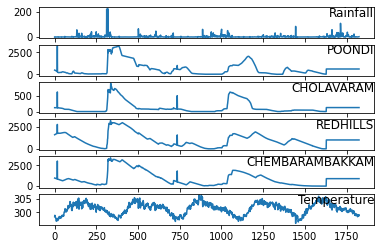

In [0]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
# dataset = read_csv('pollution.csv', header=0, index_col=0)
values = data.values
print(values[0])
# specify columns to plot
groups = [ 1, 8, 9, 10, 11, 6]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(data.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [0]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# load dataset
dataset = read_csv(list(uploaded.keys())[0], header=0, index_col=0)
dataset=dataset.drop(['Snowfall','Snow depth'],axis=1)
print(dataset.head())
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

values = dataset.values
dat=values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)
print(reframed.columns)
print(reframed.head())

            Rainfall  Relative Humidity  ...  REDHILLS  CHEMBARAMBAKKAM
Date                                     ...                           
01-01-2015  0.251461              81.35  ...    1580.0            968.0
02-01-2015  1.928893              83.74  ...    1588.0            960.0
03-01-2015  0.826237              82.31  ...    1606.0            952.0
04-01-2015  0.231998              79.81  ...    1616.0            944.0
05-01-2015  0.107708              80.94  ...    1627.0            938.0

[5 rows x 11 columns]
Index(['var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var5(t-1)',
       'var6(t-1)', 'var7(t-1)', 'var8(t-1)', 'var9(t-1)', 'var10(t-1)',
       'var11(t-1)', 'var1(t)'],
      dtype='object')
   var1(t-1)  var2(t-1)  var3(t-1)  ...  var10(t-1)  var11(t-1)   var1(t)
1   0.001128   0.763252   0.558475  ...    0.499052    0.284831  0.008655
2   0.008655   0.828893   0.705467  ...    0.501579    0.282474  0.003707
3   0.003707   0.789618   0.744812  ...    0.507265

In [0]:
# split into train and test sets
values = reframed.values
# n_train_hours = 365 * 24

n_train_hours = 365*2

train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]

test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(730, 1, 11) (730,) (898, 1, 11) (898,)


(730, 1, 11)
Train on 730 samples, validate on 898 samples
Epoch 1/50
 - 0s - loss: 0.0338 - val_loss: 0.0291
Epoch 2/50
 - 0s - loss: 0.0255 - val_loss: 0.0220
Epoch 3/50
 - 0s - loss: 0.0204 - val_loss: 0.0162
Epoch 4/50
 - 0s - loss: 0.0165 - val_loss: 0.0126
Epoch 5/50
 - 0s - loss: 0.0153 - val_loss: 0.0115
Epoch 6/50
 - 0s - loss: 0.0154 - val_loss: 0.0133
Epoch 7/50
 - 0s - loss: 0.0200 - val_loss: 0.0182
Epoch 8/50
 - 0s - loss: 0.0179 - val_loss: 0.0186
Epoch 9/50
 - 0s - loss: 0.0197 - val_loss: 0.0138
Epoch 10/50
 - 0s - loss: 0.0207 - val_loss: 0.0127
Epoch 11/50
 - 0s - loss: 0.0176 - val_loss: 0.0133
Epoch 12/50
 - 0s - loss: 0.0162 - val_loss: 0.0164
Epoch 13/50
 - 0s - loss: 0.0154 - val_loss: 0.0109
Epoch 14/50
 - 0s - loss: 0.0165 - val_loss: 0.0151
Epoch 15/50
 - 0s - loss: 0.0160 - val_loss: 0.0127
Epoch 16/50
 - 0s - loss: 0.0195 - val_loss: 0.0166
Epoch 17/50
 - 0s - loss: 0.0176 - val_loss: 0.0166
Epoch 18/50
 - 0s - loss: 0.0174 - val_loss: 0.0109
Epoch 19/50
 -

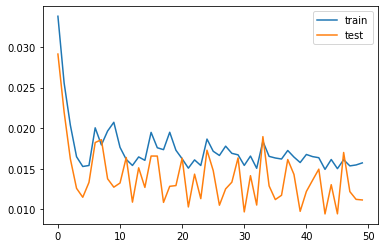

In [0]:
# design network
from keras.callbacks import EarlyStopping
model = Sequential()
print(train_X.shape)
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=50, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
print(inv_y,inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print(inv_y.shape);
print(inv_yhat.shape);
print('Test RMSE: %.3f' % rmse)


[1.86537996e-01 5.50870001e-02 7.71099981e-03 4.88999998e-04
 1.61520001e-02 2.57479995e-02 2.32700002e-03 9.99999997e-07
 0.00000000e+00 0.00000000e+00 4.64599999e-03 7.76889995e-02
 1.53719997e-02 3.38399992e-03 2.71470007e-02 1.13209998e-02
 1.02249999e-02 1.23467006e-01 3.80019993e-01 6.93292022e-01
 4.77016002e-01 1.31399999e-03 7.34899985e-03 1.23170000e-02
 5.26690006e-01 1.88027203e+00 5.80713797e+00 1.82687902e+00
 6.48360029e-02 5.46620041e-02 3.48839983e-02 1.73230004e-02
 7.46400002e-03 3.43640000e-02 2.73699989e-03 4.82000032e-04
 1.42999995e-03 0.00000000e+00 3.96599993e-03 1.00330003e-02
 1.89539995e-02 4.42459993e-02 1.92211002e-01 2.61963010e-01
 1.32071003e-01 2.88550016e-02 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.15120001e-02
 4.01979983e-02 3.55620012e-02 1.46679990e-02 1.04200002e-02
 9.78200044e-03 3.70079987e-02 2.35300008e-02 2.70699989e-03
 0.00000000e+00 1.69567004e-01 1.17554998e+00 1.15355206e+00
 4.01845008e-01 1.477452

In [0]:
#PRIVATE
# make a prediction
yhat = model.predict(train_X)
train_X = train_X.reshape((train_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, train_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
train_y = train_y.reshape((len(train_y), 1))
inv_y = concatenate((train_y, train_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
print(inv_y,inv_yhat)
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print(inv_y.shape);
print(inv_yhat.shape);
print('Test RMSE: %.3f' % rmse)


In [0]:
test_X.shape

(898, 11)

In [0]:
date=data['Date']
#date=date[:730]

In [0]:
date=date[731:1628]

In [0]:
print(date)

731     01-01-2017
732     02-01-2017
733     03-01-2017
734     04-01-2017
735     05-01-2017
           ...    
1623    12-06-2019
1624    13-06-2019
1625    14-06-2019
1626    15-06-2019
1627    16-06-2019
Name: Date, Length: 897, dtype: object


In [0]:
k=0;
month_rain_tot=0;
for i in date:
  monthnum=i.split('-')[1];
  datenum=i.split('-')[0];
  yearnum=i.split('-')[2];
  yearnum=int(yearnum);
  predicted_val=inv_yhat[k];
  if(predicted_val<0):
    predicted_val=0;
  k+=1;
  print("Date: ",i);
  if(monthnum=='01'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-2.7)/2.7)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='31'):
      avg=(month_rain_tot)/31;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((avg-2.7)/2.7)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='02'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-3.4)/3.4)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if((yearnum%4==0 and datenum=='29') or (yearnum%4!=0 and datenum=='28')):
      avg=(month_rain_tot)/int(datenum);
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-3.4)/3.4)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='03'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-0.4)/0.4)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='31'):
      avg=(month_rain_tot)/int(datenum);
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-0.4)/0.4)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='04'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-1.2)/1.2)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='30'):
      avg=(month_rain_tot)/30;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-1.2)/1.2)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='05'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-3.9)/3.9)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='31'):
      avg=(month_rain_tot)/31;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-3.9)/3.9)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='06'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-7.1)/7.1)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='30'):
      avg=(month_rain_tot)/30;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-7.1)/7.1)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='07'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-12.1)/12.1)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='31'):
      avg=(month_rain_tot)/31;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-12.1)/12.1)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='08'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-13.8)/13.8)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='31'):
      avg=(month_rain_tot)/31;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-13.8)/13.8)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='09'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-16.1)/16.1)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='30'):
      avg=(month_rain_tot)/30;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-16.1)/16.1)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='10'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-37.3)/37.3)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='31'):
      avg=(month_rain_tot)/31;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-37.3)/37.3)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='11'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-40.9)/40.9)*100>100):
      print(predicted_val , " Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='30'):
      avg=(month_rain_tot)/30;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-40.9)/40.9)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
  if(monthnum=='12'):
    month_rain_tot+=predicted_val;
    if(((predicted_val-15.2)/15.2)*100>100):
      print(predicted_val ," Flood : yes");
    else:
      print(predicted_val," normal condition");
    if(datenum=='31'):
      avg=(month_rain_tot)/31;
      month_rain_tot=0;
      print("AVERAGE OF THIS MONTH ",avg);
      if(((predicted_val-15.2)/15.2)*100<5):
        print("Drought: yes");
      else:
        print("normal condition");
    
  

Date:  01-01-2017
0  normal condition
Date:  02-01-2017
0  normal condition
Date:  03-01-2017
0  normal condition
Date:  04-01-2017
0  normal condition
Date:  05-01-2017
0  normal condition
Date:  06-01-2017
0  normal condition
Date:  07-01-2017
0  normal condition
Date:  08-01-2017
0  normal condition
Date:  09-01-2017
0  normal condition
Date:  10-01-2017
0  normal condition
Date:  11-01-2017
0  normal condition
Date:  12-01-2017
0  normal condition
Date:  13-01-2017
0  normal condition
Date:  14-01-2017
0  normal condition
Date:  15-01-2017
0  normal condition
Date:  16-01-2017
0  normal condition
Date:  17-01-2017
0  normal condition
Date:  18-01-2017
0  normal condition
Date:  19-01-2017
0  normal condition
Date:  20-01-2017
0  normal condition
Date:  21-01-2017
0  normal condition
Date:  22-01-2017
0  normal condition
Date:  23-01-2017
0  normal condition
Date:  24-01-2017
0  normal condition
Date:  25-01-2017
0  normal condition
Date:  26-01-2017
0  normal condition
Date:  27-01